In [10]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

In [3]:
df = pd.read_excel('~/Downloads/member.xls')

In [4]:
df = df.loc[:, 'TNP': 'Height']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10118 entries, 0 to 10117
Data columns (total 13 columns):
TNP           10118 non-null int64
Region        10118 non-null object
Age           10064 non-null float64
Gender        10118 non-null int64
SS            10118 non-null int64
Rosvit        9557 non-null object
Postgrad      9169 non-null float64
Experience    7180 non-null float64
SocSt         9352 non-null float64
Branch        3715 non-null float64
Salary        4009 non-null float64
Weight        9351 non-null float64
Height        9350 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 1.0+ MB


In [5]:
results = ols('Height ~ C(SS)', data=df).fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     636.2
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:46:41   Log-Likelihood:                -37207.
No. Observations:                9350   AIC:                         7.442e+04
Df Residuals:                    9346   BIC:                         7.445e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.0582      0.183    919.608      0.000     167.700     168.416
C(SS)[T.2]   -13.5567      0.312    -43.504      0.000     -14.168     -12.946
C(SS)[T.3]    -2.9617      0.546     -5.421      0.000      -4.033      -1.891
C(SS)[T.4]    -5.5493      0.436    -12.736      0.000      -6.403      -4.695
==============================================================================
Omnibus:                     1402.101   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3819.267
Skew:                          -0.818   Prob(JB):                         0.00
Kurtosis:                       5.670   Cond. No.                         4.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F(3, 9346)=636.2, p~=0.00, отже бачимо, що модель значуща
з p-value в тиблиці видно, що різниця між группою Intercept - 1(одружений) та группами 2,3,4 значуща(неодружений, розлучений, удівець)

In [31]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(SS),3.197830e+05,3.0,636.174175,0.0
Residual,1.565971e+06,9346.0,NaN,NaN


оскільки модель значуща, вона поясняє значну кількість відхилень (sum_sq = 3.2*10^5)  
рядок Residual вказує на несистематичні відхилення у даних (unexplained variance)

In [13]:
plt.rcParams['figure.figsize'] = (10,10)

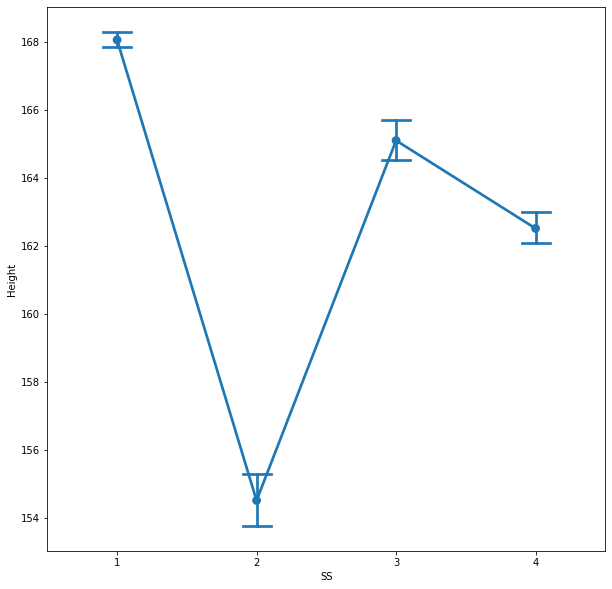

In [14]:
sns.pointplot(x='SS', y='Height', data=df, capsize=.2)

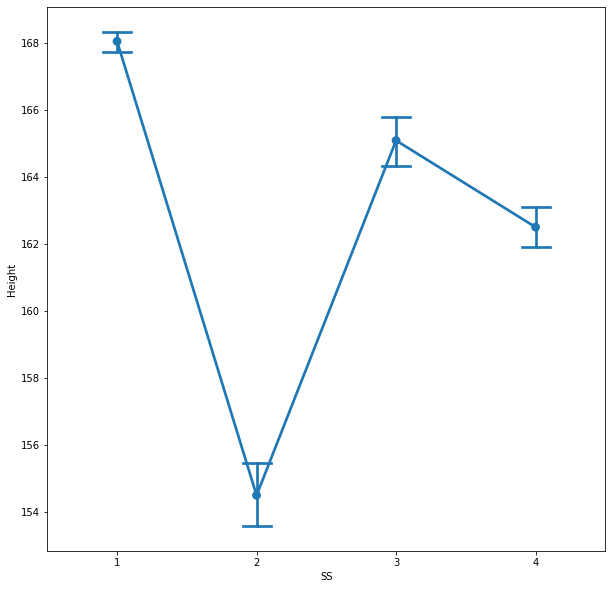

In [37]:
alpha_bonf = 0.05 / 4
sns.pointplot(x='SS', y='Height', data=df, capsize=.2, ci=100-alpha_bonf*100)

за графіками однорідності середніх не спостерігається, з поправкою Бонферроні також

In [38]:
df = df[['SS', 'Height']].dropna()

In [36]:
stats.levene(df['Height'][df['SS']==1],
            df['Height'][df['SS']==2],
            df['Height'][df['SS']==3],
            df['Height'][df['SS']==4])

LeveneResult(statistic=913.6558748464514, pvalue=0.0)

p~=0, отже дисперсії можна вважати неоднорідними